# CENSUS INCOME PROJECT

### Importing the datasets

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
data=pd.read_csv("census-income .csv")

In [284]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [285]:
data.shape

(32561, 15)

### Data Cleaning

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   annual income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [287]:
for x in data.columns:
    print(data[x].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [288]:
data.columns=data.columns.str.strip()

In [289]:
def strip_space(x):
    return x.strip() if isinstance(x,str) else x

In [290]:
data=data.applymap(strip_space)

In [291]:
for x in data.columns:
    print(data[x].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [292]:
data.replace('?',np.nan,inplace=True)

In [293]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual income        0
dtype: int64

In [294]:
data.dropna(inplace=True)

In [295]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual income     0
dtype: int64

In [296]:
data.duplicated().sum()

23

In [297]:
data.drop_duplicates(inplace=True)

### Outlier Analysis

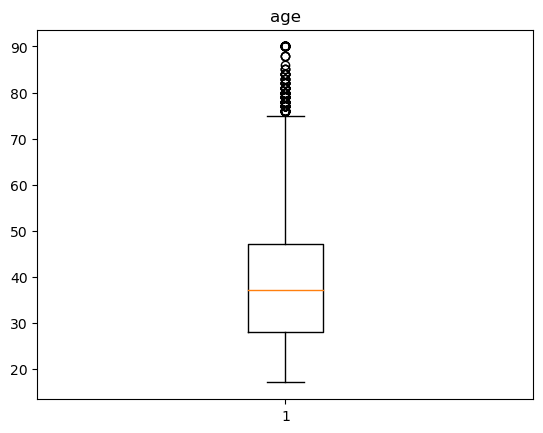

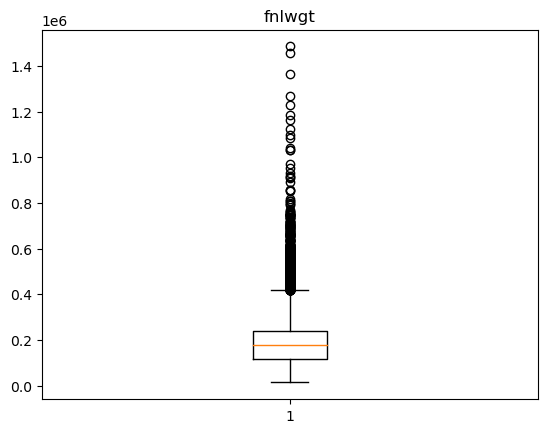

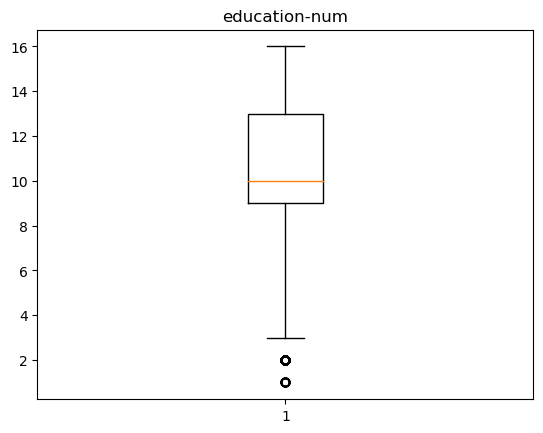

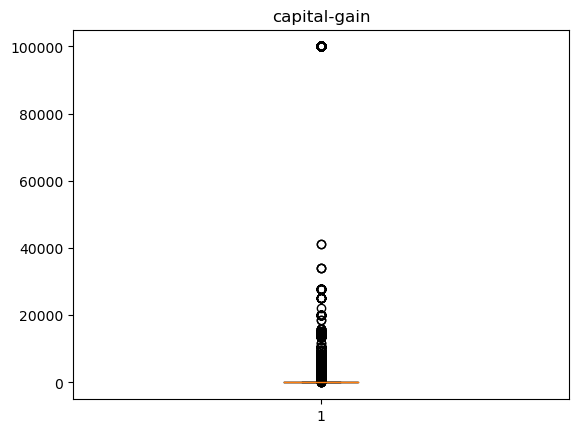

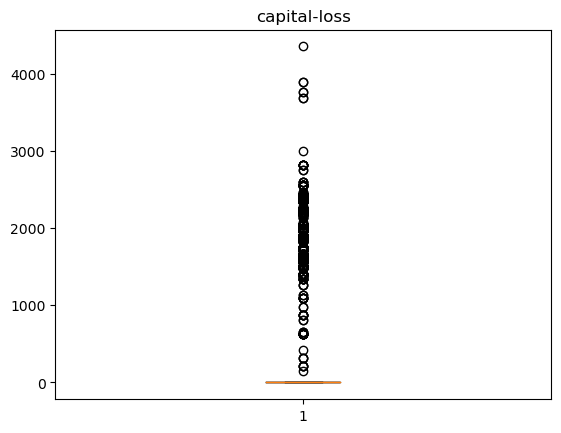

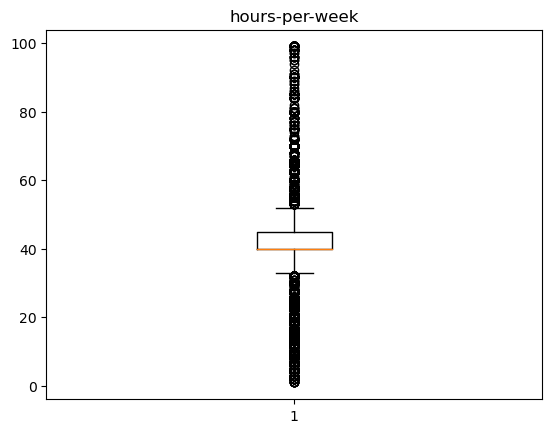

In [298]:
for x in data.columns:
    if data[x].dtype!="object":
        plt.boxplot(data[x])
        plt.title(x)
        plt.show()

In [299]:
out_cols=['age','fnlwgt','education-num','hours-per-week']

In [300]:
for col in out_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    d=data[(data[col]>=LL)&(data[col]<=UL)]

In [301]:
d

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Data Visualisation

In [349]:
# Distribution of males and females

In [363]:
gender_counts=data["sex"].value_counts()

In [364]:
gender_counts

Male      20366
Female     9773
Name: sex, dtype: int64

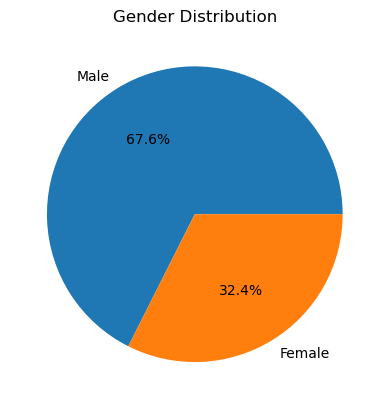

In [367]:
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

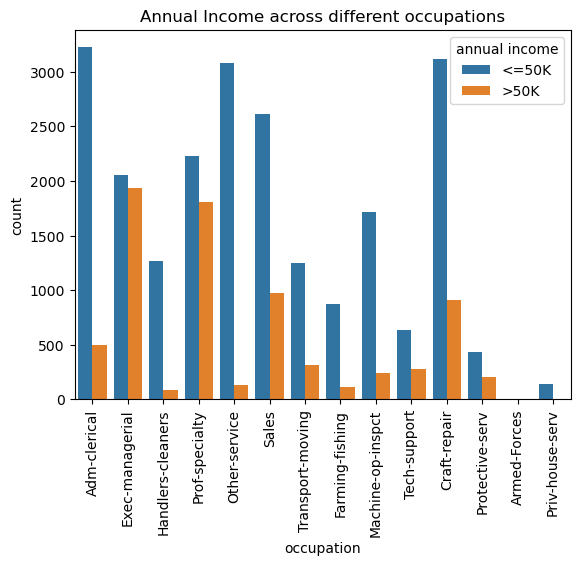

In [368]:
# How does annual income vary across different occupations? 

sns.countplot(x="occupation",hue="annual income",data=data)
plt.title("Annual Income across different occupations")
plt.xticks(rotation=90)
plt.show()

### Label Encoding

In [302]:
from sklearn.preprocessing import LabelEncoder

In [303]:
le=LabelEncoder()

In [304]:
for i in d.columns:
    if d[i].dtype=="object":
        d[i]=le.fit_transform(d[i])

C:\Users\dell\AppData\Local\Temp\ipykernel_8156\3967056136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[i]=le.fit_transform(d[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_8156\3967056136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[i]=le.fit_transform(d[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_8156\3967056136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [305]:
d

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0


### Feature Selection

In [306]:
d.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual income
age,1.000000,0.058627,-0.083204,-0.024231,0.021670,-0.269415,0.002537,-0.202097,0.015352,0.060574,0.084251,0.058027,0.047037,0.004400,0.246967
workclass,0.058627,1.000000,-0.025537,0.005278,0.029847,-0.022534,0.023187,-0.050285,0.044554,0.056731,0.035281,0.002568,0.058624,0.006436,0.008699
fnlwgt,-0.083204,-0.025537,1.000000,-0.029275,-0.049809,0.032441,0.004671,0.006592,-0.023597,0.027254,-0.004819,-0.012735,-0.011144,-0.074287,-0.009125
education,-0.024231,0.005278,-0.029275,1.000000,0.319712,-0.025419,-0.036996,0.013927,0.011386,-0.041550,0.025090,0.013244,0.036449,0.092355,0.070802
education-num,0.021670,0.029847,-0.049809,0.319712,1.000000,-0.026735,0.106569,-0.061269,0.027522,-0.021383,0.107182,0.073108,0.141300,0.104936,0.325225
marital-status,-0.269415,-0.022534,0.032441,-0.025419,-0.026735,1.000000,0.020125,0.140610,-0.075541,-0.078599,-0.033388,-0.029049,-0.080319,-0.032990,-0.164204
occupation,0.002537,0.023187,0.004671,-0.036996,0.106569,0.020125,1.000000,-0.071735,0.000707,0.081858,0.019849,0.018123,0.063553,-0.005136,0.065251
relationship,-0.202097,-0.050285,0.006592,0.013927,-0.061269,0.140610,-0.071735,1.000000,-0.127060,-0.592172,-0.046512,-0.064746,-0.177047,-0.014788,-0.235444
race,0.015352,0.044554,-0.023597,0.011386,0.027522,-0.075541,0.000707,-0.127060,1.000000,0.102113,0.015311,0.022750,0.094392,0.125431,0.074781
sex,0.060574,0.056731,0.027254,-0.041550,-0.021383,-0.078599,0.081858,-0.592172,0.102113,1.000000,0.038689,0.049654,0.175607,0.004411,0.208079


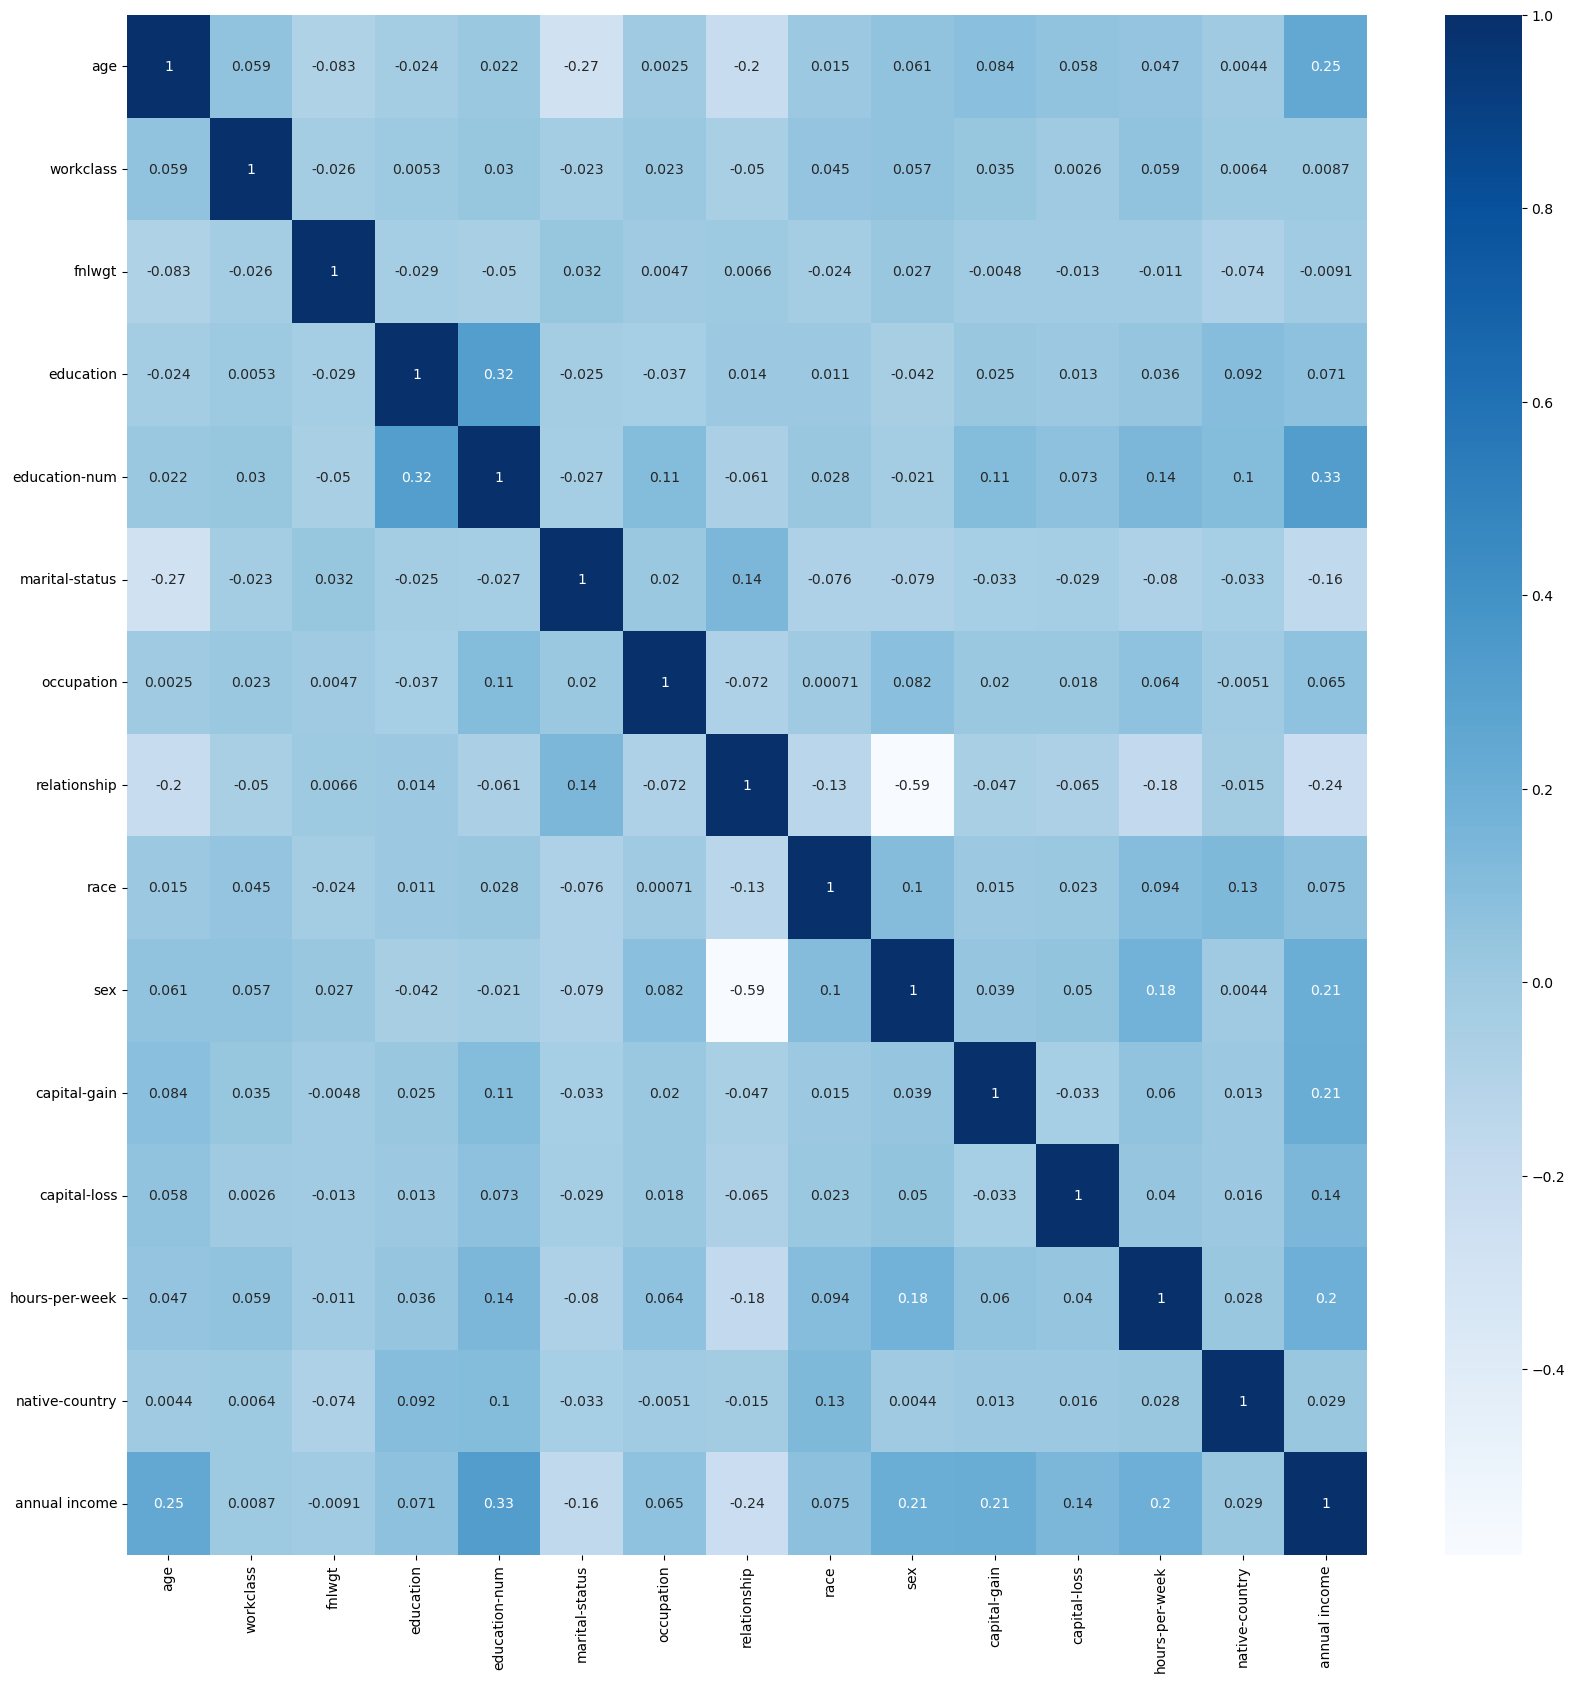

In [307]:
plt.figure(figsize=(20,20))
sns.heatmap(d.corr(),cmap="Blues", annot=True)
plt.show()

### RFE ( RECURSIVE FEATURE ELIMINATION)

In [308]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [309]:
rfe=RFE(LogisticRegression())

### Splitting the data into dependent and independent datasets.

In [310]:
x=d.iloc[:,:-1]
y=d["annual income"]

In [311]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,15,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38


In [312]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: annual income, Length: 22192, dtype: int32

In [313]:
rfe.fit(x,y)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RFE(estimator=LogisticRegression())

In [314]:
# Check which columns are important as per RFE

In [315]:
rfe.ranking_

array([4, 1, 8, 3, 1, 1, 5, 1, 1, 1, 7, 6, 1, 2])

In [316]:
selected_features=x.columns[rfe.get_support()]

In [317]:
x=x[selected_features]

### Model Building

In [318]:
x

,workclass,education-num,marital-status,relationship,race,sex,hours-per-week
0,5,13,4,1,4,1,40
2,2,9,0,1,4,1,40
3,2,7,2,0,2,1,40
4,2,13,2,5,2,0,40
5,2,14,2,5,4,0,40
...,...,...,...,...,...,...,...
32555,2,10,4,1,4,1,40
32556,2,12,2,5,4,0,38
32557,2,9,2,0,4,1,40
32558,2,9,6,4,4,0,40


In [319]:
# Splitting the data into training and testing

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [322]:
x_train.shape

(15534, 7)

In [323]:
x_test.shape

(6658, 7)

### Model Implementation

In [243]:
from sklearn.linear_model import LogisticRegression

In [324]:
model=LogisticRegression()

In [325]:
# Training the model
model.fit(x_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [326]:
# Testing the model

In [327]:
prediction=model.predict(x_test)

In [328]:
prediction

array([1, 1, 0, ..., 0, 0, 0])

In [329]:
y_test

32061    0
1547     0
3043     0
7161     0
14424    0
        ..
28291    0
28298    1
2198     1
19394    0
27054    0
Name: annual income, Length: 6658, dtype: int32

In [330]:
from sklearn.metrics import *

In [331]:
accuracy_score(y_test,prediction)

0.7958846500450586

### Confusion Matrix

In [332]:
cm=confusion_matrix(y_test,prediction)

<Axes: >

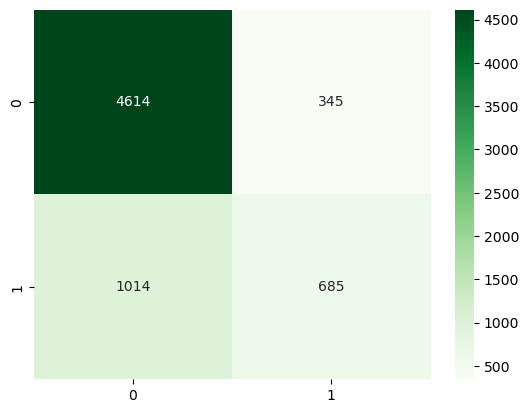

In [333]:
sns.heatmap(cm, cmap="Greens", annot=True, fmt="d")

### Classification_Report

In [334]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4959
           1       0.26      0.16      0.20      1699

    accuracy                           0.67      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.62      0.67      0.64      6658



### Let's pass the new data for prediction.

In [335]:
model.predict([[5,6,2,3,0,0,70]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## Result-> The model is predicting that the average salary for the new data will be less than 50K.